In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

In [2]:
%matplotlib inline

In [3]:
con_dist = pd.read_csv("condom_dist_u.csv", index_col = "Community Area Name")
fchla = pd.read_csv("chlamydia_females.csv", index_col = "Community Area Name")
#read in and label all csv files, make community area name the leftmost column

In [4]:
con_dist_group = con_dist.groupby(["Community Area Name"]).count() #group condom distribution sites csv file by community area
con_dist_group.dropna(inplace = True) #get rid of all blank rows
con_dist_group.rename(columns = {"Name" : "Number_of_Condom_Centers"}, inplace = True) #rename # of condom centers column to be more clear
con_dist_group.head(5)

,Number_of_Condom_Centers
Community Area Name,
Archer Heights,1
Auburn Gresham,2
Austin,8
Belmont Cragin,2
Beverly,1


In [5]:
con_fchla_merged = con_dist_group.join(fchla) #merge condom distribution centers and female chlamydia datasets
con_fchla_merged.rename(columns = {"Incidence Rate 2013" : "Incidence_Rate_2013"}, inplace = True)
con_fchla_merged.rename(columns = {"Incidence Rate 2014" : "Incidence_Rate_2014"}, inplace = True)
con_fchla_merged

,Number_of_Condom_Centers,Community Area,Cases 2000 Female 15-44,Incidence Rate 2000,Incidence Rate 2000 Lower CI,Incidence Rate 2000 Upper CI,Cases 2001 Female 15-44,Incidence Rate 2001,Incidence Rate 2001 Lower CI,Incidence Rate 2001 Upper CI,...,Incidence Rate 2012 Upper CI,Cases 2013 Female 15-44,Incidence_Rate_2013,Incidence Rate 2013 Lower CI,Incidence Rate 2013 Upper CI,Cases 2014 Female 15-44,Incidence_Rate_2014,Incidence Rate 2014 Lower CI,Incidence Rate 2014 Upper CI,WARNING
Community Area Name,,,,,,,,,,,,,,,,,,,,,
Archer Heights,1,57.0,13.0,477.6,254.3,816.7,9.0,326.8,149.4,620.4,...,2795.3,47.0,1544.0,1134.5,2053.2,64.0,2102.5,1619.2,2684.9,Rate and confidence interval estimates for yea...
Auburn Gresham,2,71.0,459.0,3647.8,3314.1,3981.5,496.0,4012.0,3658.9,4365.1,...,6901.5,581.0,5595.7,5140.7,6050.7,608.0,5855.7,5390.2,6321.2,NaN
Austin,8,25.0,1136.0,4040.3,3805.3,4275.3,1144.0,4159.2,3918.2,4400.2,...,7387.9,1441.0,6550.9,6212.7,6889.1,1298.0,5900.8,5579.8,6221.8,NaN
Belmont Cragin,2,19.0,156.0,855.5,721.3,989.7,167.0,918.3,779.0,1057.6,...,1931.4,307.0,1731.7,1538.0,1925.4,344.0,1940.4,1735.3,2145.5,NaN
Beverly,1,72.0,32.0,710.8,486.2,1003.4,36.0,816.3,571.7,1130.1,...,1935.9,38.0,1061.2,751.0,1456.6,42.0,1172.9,845.3,1585.4,NaN
Brighton Park,2,58.0,79.0,770.1,609.7,959.8,102.0,994.0,801.1,1186.9,...,1837.8,174.0,1691.1,1439.8,1942.4,203.0,1973.0,1701.6,2244.4,NaN
Calumet Heights,2,48.0,90.0,2843.6,2286.6,3495.3,115.0,3728.9,3047.4,4410.4,...,7336.7,119.0,5048.8,4141.7,5955.9,74.0,3139.6,2465.3,3941.5,NaN
Chatham,3,44.0,296.0,3577.5,3169.9,3985.1,276.0,3422.6,3018.8,3826.4,...,6590.8,320.0,5186.4,4618.1,5754.7,303.0,4910.9,4357.9,5463.9,NaN
Chicago Lawn,1,66.0,377.0,2488.8,2237.6,2740.0,434.0,2905.7,2632.3,3179.1,...,5331.7,519.0,3982.8,3640.1,4325.5,593.0,4550.7,4184.4,4917.0,NaN


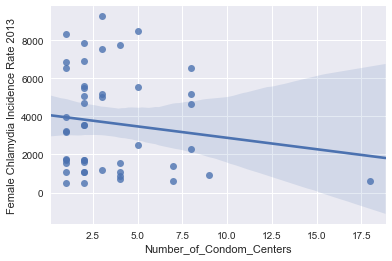

In [6]:
graph11 = sns.regplot(x = "Number_of_Condom_Centers", y = "Incidence_Rate_2013", data = con_fchla_merged) #create scatter plot to show relationship between # of condom sites and STI incidence rate
graph11.set_ylabel("Female Chlamydia Incidence Rate 2013") #fix y axis label

In [8]:
ols = smf.ols(formula = "Incidence_Rate_2013 ~ Number_of_Condom_Centers", data = con_fchla_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Incidence_Rate_2013   R-squared:                       0.021
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                    0.9266
Date:                 Tue, 28 Nov 2017   Prob (F-statistic):              0.341
Time:                         20:20:47   Log-Likelihood:                -426.97
No. Observations:                   46   AIC:                             857.9
Df Residuals:                       44   BIC:                             861.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 4074.2057    588.180      6.927      0.000    2888.807    5259.604
Number_of_Condom_Centers  -119.8825    124.542     -0.963      0.341    -370.880     131.115
==============================================================================
Omnibus:                        8.494   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                4.014
Skew:                           0.483   Prob(JB):                        0.134
Kurtosis:                       1.923   Cond. No.                         7.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

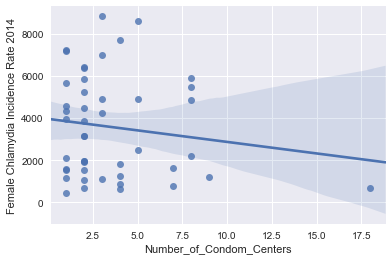

In [7]:
graph12 = sns.regplot(x = "Number_of_Condom_Centers", y = "Incidence_Rate_2014", data = con_fchla_merged) #create scatter plot to show relationship between # of condom sites and STI incidence rate
graph12.set_ylabel("Female Chlamydia Incidence Rate 2014") #fix y axis label

In [9]:
ols = smf.ols(formula = "Incidence_Rate_2014 ~ Number_of_Condom_Centers", data = con_fchla_merged)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Incidence_Rate_2014   R-squared:                       0.020
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                    0.9188
Date:                 Tue, 28 Nov 2017   Prob (F-statistic):              0.343
Time:                         20:21:04   Log-Likelihood:                -422.92
No. Observations:                   46   AIC:                             849.8
Df Residuals:                       44   BIC:                             853.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3956.9820    538.526      7.348      0.000    2871.655    5042.309
Number_of_Condom_Centers  -109.2992    114.028     -0.959      0.343    -339.108     120.509
==============================================================================
Omnibus:                        5.297   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                3.410
Skew:                           0.490   Prob(JB):                        0.182
Kurtosis:                       2.096   Cond. No.                         7.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""